<a href="https://colab.research.google.com/github/914book/FinalProjectGroupD/blob/Circle_DB/project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sqlalchemy import create_engine
from getpass import getpass
secret = getpass('Enter the secret value: ')

Enter the secret value: ··········


In [2]:
pip install psycopg2

In [3]:
import psycopg2
connection = psycopg2.connect(
    host = 'housingdatabase.chkn2wwlsbys.us-east-2.rds.amazonaws.com',
    port = 5432,
    user = 'postgres',
    password = secret,
    database='NYChouses'
    )
cursor=connection.cursor()


/usr/local/lib/python3.6/dist-packages/psycopg2/__init__.py:144: UserWarning: The psycopg2 wheel package will be renamed from release 2.8; in order to keep installing from binary please use "pip install psycopg2-binary" instead. For details see: <http://initd.org/psycopg/docs/install.html#binary-install-from-pypi>.
  """)


In [4]:
import pandas as pd

sql = """
SELECT *
FROM fulloutpuhousing
"""
fulloutpuhousing = pd.read_sql(sql, con=connection)

In [5]:
pd.set_option('display.max_colwidth',1000)

In [6]:
#table for EDA
fulloutpuhousing.head()


,address,zipcode,date,beds,bath,sq_ft,house_price,city,county,county_type,boro,income_over_100k,income_under_100k,employed,unemployed
0,"4205 48th Ave APT 3G, Flushing, NY 11377",11377,2020-10-16,Studio,1.0,53400,244000,Woodside,Woodside,Queens,Queens County,166650,1015040,1099996,39401
1,"4205 48th Ave APT 3G, Flushing, NY 11377",11377,2020-10-16,Studio,1.0,53400,244000,Woodside,Woodside,Queens,Queens County,166650,1015040,1099996,39401
2,"14404 76th Rd, Flushing, NY 11367",11367,2020-10-16,3,3.0,1980,680000,Flushing,Flushing,Queens,Queens County,166650,1015040,1099996,39401
3,"14404 76th Rd, Flushing, NY 11367",11367,2020-10-16,3,3.0,1980,680000,Flushing,Flushing,Queens,Queens County,166650,1015040,1099996,39401
4,"11128 130th St, Jamaica, NY 11420",11420,2020-10-16,3,2.0,1440,625000,South Ozone Park,South Ozone Park,Queens,Queens County,166650,1015040,1099996,39401


In [7]:
#table for M/L model based of test data share with Toral
house2data = fulloutpuhousing[['house_price', 'address', 'zipcode', 'date', 'beds', 'bath','sq_ft', 'boro', 'employed', 'unemployed', 'income_over_100k', 'income_under_100k']]
house2data.columns = ['price','address','zip','date','beds','bath','sq_ft','boro','Employed','Unemployed','income above 100k','income below 100k']
house2data


,price,address,zip,date,beds,bath,sq_ft,boro,Employed,Unemployed,income above 100k,income below 100k
0,244000,"4205 48th Ave APT 3G, Flushing, NY 11377",11377,2020-10-16,Studio,1.0,53400,Queens County,1099996,39401,166650,1015040
1,244000,"4205 48th Ave APT 3G, Flushing, NY 11377",11377,2020-10-16,Studio,1.0,53400,Queens County,1099996,39401,166650,1015040
2,680000,"14404 76th Rd, Flushing, NY 11367",11367,2020-10-16,3,3.0,1980,Queens County,1099996,39401,166650,1015040
3,680000,"14404 76th Rd, Flushing, NY 11367",11367,2020-10-16,3,3.0,1980,Queens County,1099996,39401,166650,1015040
4,625000,"11128 130th St, Jamaica, NY 11420",11420,2020-10-16,3,2.0,1440,Queens County,1099996,39401,166650,1015040
...,...,...,...,...,...,...,...,...,...,...,...,...
68543,3350000,"82 Douglas Rd, Staten Island, NY 10304",10304,2020-09-04,6,6.0,12200,Richmond County,213734,8585,55180,173430
68544,185000,"475 Armstrong Ave APT H2, Staten Island, NY 10308",10308,2020-09-28,Studio,NaN,38647,Richmond County,213734,8585,55180,173430
68545,185000,"475 Armstrong Ave APT H2, Staten Island, NY 10308",10308,2020-09-28,Studio,NaN,38647,Richmond County,213734,8585,55180,173430
68546,585000,"54 Discala Ln, Staten Island, NY 10312",10312,2020-09-04,0,0.0,62350,Richmond County,213734,8585,55180,173430


In [8]:
house2data.groupby('boro').mean()

,price,zip,bath,sq_ft,Employed,Unemployed,income above 100k,income below 100k
boro,,,,,,,,
New York County,2.200729e+06,10019.301713,1.467185,6219.493390,879665.0,31973.0,300250.0,594060.0
Queens County,7.026108e+05,11389.757455,1.862737,4115.249912,1099996.0,39401.0,166650.0,1015040.0
Richmond County,5.824694e+05,10308.421703,2.323308,1830.938187,213734.0,8585.0,55180.0,173430.0


In [9]:

# Import our dependencies
import pandas as pd
import sklearn as skl
from pathlib import Path
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import seaborn as sns
import tensorflow as tf

In [10]:
df = house2data

In [11]:

# Read in Housing data
df.head()

,price,address,zip,date,beds,bath,sq_ft,boro,Employed,Unemployed,income above 100k,income below 100k
0,244000,"4205 48th Ave APT 3G, Flushing, NY 11377",11377,2020-10-16,Studio,1.0,53400,Queens County,1099996,39401,166650,1015040
1,244000,"4205 48th Ave APT 3G, Flushing, NY 11377",11377,2020-10-16,Studio,1.0,53400,Queens County,1099996,39401,166650,1015040
2,680000,"14404 76th Rd, Flushing, NY 11367",11367,2020-10-16,3,3.0,1980,Queens County,1099996,39401,166650,1015040
3,680000,"14404 76th Rd, Flushing, NY 11367",11367,2020-10-16,3,3.0,1980,Queens County,1099996,39401,166650,1015040
4,625000,"11128 130th St, Jamaica, NY 11420",11420,2020-10-16,3,2.0,1440,Queens County,1099996,39401,166650,1015040


In [12]:
# Print out the boro value counts
boro_counts = df.boro.value_counts()
boro_counts

Queens County                                         45608
New York County                                       21484
Richmond County                                        1456
Name: boro, dtype: int64

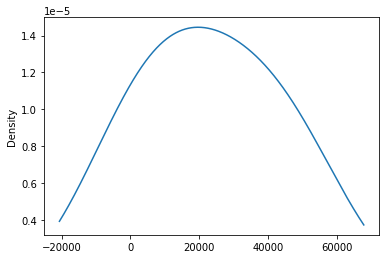

In [13]:

# Visualize the value counts
boro_counts.plot.density()

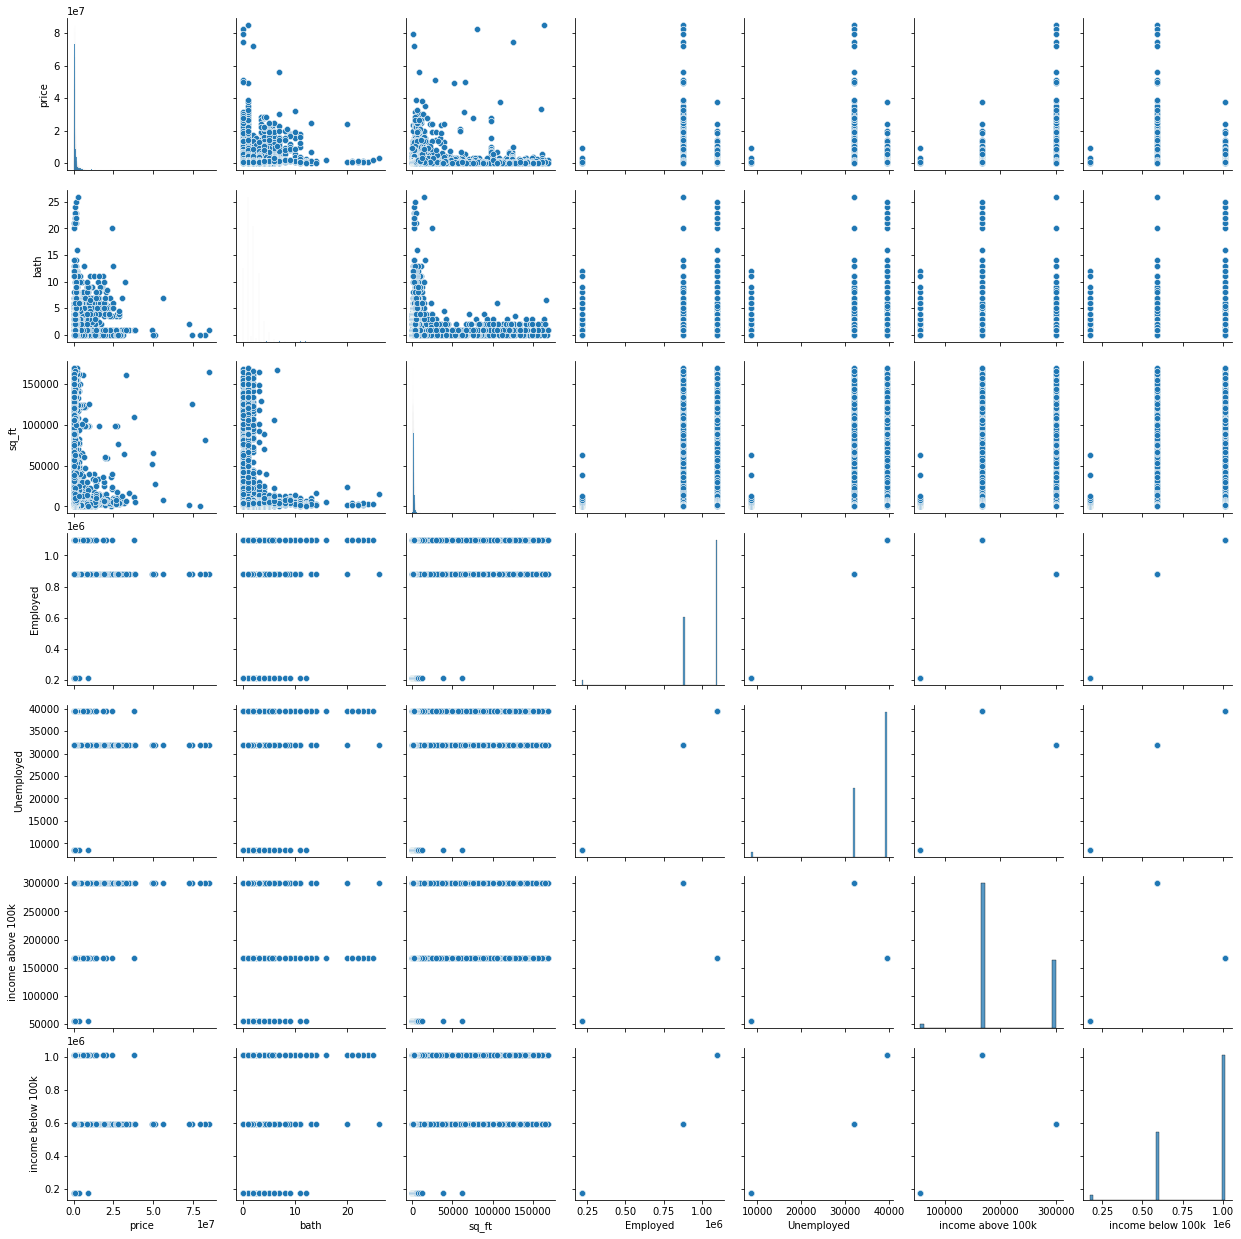

In [14]:
sns.pairplot(df.drop(['zip'], axis=1))

In [15]:
new_df = df.drop(['address', 'date'], axis=1)
new_df.head()


,price,zip,beds,bath,sq_ft,boro,Employed,Unemployed,income above 100k,income below 100k
0,244000,11377,Studio,1.0,53400,Queens County,1099996,39401,166650,1015040
1,244000,11377,Studio,1.0,53400,Queens County,1099996,39401,166650,1015040
2,680000,11367,3,3.0,1980,Queens County,1099996,39401,166650,1015040
3,680000,11367,3,3.0,1980,Queens County,1099996,39401,166650,1015040
4,625000,11420,3,2.0,1440,Queens County,1099996,39401,166650,1015040


In [16]:
# Create the OneHotEncoder instance
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(sparse=False,drop ="first")

In [17]:
# Fit the encoder and produce encoded DataFrame
encode_df = pd.DataFrame(enc.fit_transform(new_df.boro.values.reshape(-1,1)))

In [18]:
# Rename encoded columns
encode_df.columns = enc.get_feature_names(['boro'])
encode_df.head()

,boro_Queens County,boro_Richmond County
0,1.0,0.0
1,1.0,0.0
2,1.0,0.0
3,1.0,0.0
4,1.0,0.0


In [19]:
# Merge the two DataFrames together and drop the boro column
new2_df=new_df.merge(encode_df,left_index=True,right_index=True).drop("boro",1)
new2_df.head()

,price,zip,beds,bath,sq_ft,Employed,Unemployed,income above 100k,income below 100k,boro_Queens County,boro_Richmond County
0,244000,11377,Studio,1.0,53400,1099996,39401,166650,1015040,1.0,0.0
1,244000,11377,Studio,1.0,53400,1099996,39401,166650,1015040,1.0,0.0
2,680000,11367,3,3.0,1980,1099996,39401,166650,1015040,1.0,0.0
3,680000,11367,3,3.0,1980,1099996,39401,166650,1015040,1.0,0.0
4,625000,11420,3,2.0,1440,1099996,39401,166650,1015040,1.0,0.0


In [20]:

#Find null Values

for column in new2_df.columns:
    print(f"Column {column} has {new2_df[column].isnull().sum()} null values")

Column price has 0 null values
Column zip has 0 null values
Column beds has 0 null values
Column bath has 126 null values
Column sq_ft has 0 null values
Column Employed has 0 null values
Column Unemployed has 0 null values
Column income above 100k has 0 null values
Column income below 100k has 0 null values
Column boro_Queens County                                      has 0 null values
Column boro_Richmond County                                    has 0 null values


In [21]:
# List dataframe data types
new2_df.dtypes

price                                                        int64
zip                                                          int64
beds                                                        object
bath                                                       float64
sq_ft                                                        int64
Employed                                                     int64
Unemployed                                                   int64
income above 100k                                            int64
income below 100k                                            int64
boro_Queens County                                         float64
boro_Richmond County                                       float64
dtype: object

In [22]:
new2_df['zip']=new2_df['zip'].astype('str')
new2_df.head()

,price,zip,beds,bath,sq_ft,Employed,Unemployed,income above 100k,income below 100k,boro_Queens County,boro_Richmond County
0,244000,11377,Studio,1.0,53400,1099996,39401,166650,1015040,1.0,0.0
1,244000,11377,Studio,1.0,53400,1099996,39401,166650,1015040,1.0,0.0
2,680000,11367,3,3.0,1980,1099996,39401,166650,1015040,1.0,0.0
3,680000,11367,3,3.0,1980,1099996,39401,166650,1015040,1.0,0.0
4,625000,11420,3,2.0,1440,1099996,39401,166650,1015040,1.0,0.0


In [23]:
# Print out the boro value counts
zip_counts = df.zip.value_counts()
zip_counts

11413    1440
11420    1438
11379    1438
11365    1430
11412    1418
         ... 
11102      26
10075       8
10128       8
10065       8
11101       4
Name: zip, Length: 107, dtype: int64

In [24]:
# Create the OneHotEncoder instance
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(sparse=False,drop ="first")

In [25]:
# Fit the encoder and produce encoded DataFrame
encode_df = pd.DataFrame(enc.fit_transform(new_df.zip.values.reshape(-1,1)))

In [26]:
# Rename encoded columns
encode_df.columns = enc.get_feature_names(['zip'])
encode_df.head()

,zip_10002,zip_10003,zip_10004,zip_10005,zip_10006,zip_10007,zip_10009,zip_10010,zip_10011,zip_10012,zip_10013,zip_10014,zip_10016,zip_10017,zip_10018,zip_10019,zip_10021,zip_10022,zip_10023,zip_10024,zip_10025,zip_10026,zip_10027,zip_10028,zip_10029,zip_10030,zip_10031,zip_10032,zip_10033,zip_10034,zip_10035,zip_10036,zip_10037,zip_10038,zip_10039,zip_10040,zip_10044,zip_10065,zip_10075,zip_10128,...,zip_11362,zip_11363,zip_11364,zip_11365,zip_11366,zip_11367,zip_11368,zip_11369,zip_11370,zip_11372,zip_11373,zip_11374,zip_11375,zip_11377,zip_11378,zip_11379,zip_11385,zip_11411,zip_11412,zip_11413,zip_11414,zip_11415,zip_11416,zip_11417,zip_11418,zip_11419,zip_11420,zip_11421,zip_11422,zip_11423,zip_11426,zip_11427,zip_11428,zip_11429,zip_11430,zip_11432,zip_11433,zip_11434,zip_11435,zip_11436
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [27]:
# Merge the two DataFrames together and drop the boro column
new3_df=new2_df.merge(encode_df,left_index=True,right_index=True).drop("zip",1)
new3_df.head()

,price,beds,bath,sq_ft,Employed,Unemployed,income above 100k,income below 100k,boro_Queens County,boro_Richmond County,zip_10002,zip_10003,zip_10004,zip_10005,zip_10006,zip_10007,zip_10009,zip_10010,zip_10011,zip_10012,zip_10013,zip_10014,zip_10016,zip_10017,zip_10018,zip_10019,zip_10021,zip_10022,zip_10023,zip_10024,zip_10025,zip_10026,zip_10027,zip_10028,zip_10029,zip_10030,zip_10031,zip_10032,zip_10033,zip_10034,...,zip_11362,zip_11363,zip_11364,zip_11365,zip_11366,zip_11367,zip_11368,zip_11369,zip_11370,zip_11372,zip_11373,zip_11374,zip_11375,zip_11377,zip_11378,zip_11379,zip_11385,zip_11411,zip_11412,zip_11413,zip_11414,zip_11415,zip_11416,zip_11417,zip_11418,zip_11419,zip_11420,zip_11421,zip_11422,zip_11423,zip_11426,zip_11427,zip_11428,zip_11429,zip_11430,zip_11432,zip_11433,zip_11434,zip_11435,zip_11436
0,244000,Studio,1.0,53400,1099996,39401,166650,1015040,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,244000,Studio,1.0,53400,1099996,39401,166650,1015040,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,680000,3,3.0,1980,1099996,39401,166650,1015040,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,680000,3,3.0,1980,1099996,39401,166650,1015040,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,625000,3,2.0,1440,1099996,39401,166650,1015040,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [28]:
new3_df.dtypes

price          int64
beds          object
bath         float64
sq_ft          int64
Employed       int64
              ...   
zip_11432    float64
zip_11433    float64
zip_11434    float64
zip_11435    float64
zip_11436    float64
Length: 116, dtype: object

In [29]:
# Create the StandardScaler instance
scaler = StandardScaler()

In [30]:
# Fit the StandardScaler
scaler.fit(new3_df)

ValueError: ignored